**This database contains a collection of near-infrared images captured by the Leap Motion sensor, designed specifically for hand gesture recognition tasks. It serves as a valuable resource for researchers and developers working on computer vision, gesture recognition, and human-computer interaction.**

# Data Composition
The dataset includes a total of 10 distinct hand gestures. These gestures were consistently performed by 10 different subjects, providing a diverse and balanced dataset. The participants consist of 5 men and 5 women, ensuring gender diversity.

# Sensor Technology
The images were captured using the Leap Motion sensor, known for its high accuracy in tracking hand movements. The sensor captures near-infrared images, which are particularly useful in achieving precise gesture recognition in varying lighting conditions.

# Applications
This dataset is well-suited for applications in gesture recognition systems, virtual reality (VR) interfaces, and the development of more intuitive human-computer interaction methods. It can also be utilized for training machine learning models aimed at interpreting hand gestures in real-time.

# Dataset Specifications
Gestures: 10 unique hand gestures.
Subjects: 10 individuals (5 men and 5 women).
Image Type: Near-infrared images.
Sensor: Leap Motion sensor.
Use Cases

In [1]:
import warnings
warnings.filterwarnings('ignore')

import keras
import matplotlib.pyplot as plt # for plotting
import os # provides a way of using operating system dependent functionality
import cv2 #Image handling library
import numpy as np

# Import of keras model and hidden layers for our convolutional network
from keras.layers import Conv2D, Activation, MaxPool2D, Dense, Flatten, Dropout

Using TensorFlow backend.


In [2]:
CATEGORIES = ["01_palm", '02_l','03_fist','04_fist_moved','05_thumb','06_index','07_ok','08_palm_moved','09_c','10_down']
IMG_SIZE = 50

# paths for dataset
data_path = "../input/leapgestrecog/leapGestRecog"

## The Data

In [3]:
# Loading the images and their class(0 - 9)
image_data = []
for dr in os.listdir(data_path):
    for category in CATEGORIES:
        class_index = CATEGORIES.index(category)
        path = os.path.join(data_path, dr, category)
        for img in os.listdir(path):
            try:
                img_arr = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
                image_data.append([cv2.resize(img_arr, (IMG_SIZE, IMG_SIZE)), class_index])
            except Exception as e:
                pass
image_data[0]

[array([[4, 5, 7, ..., 4, 3, 4],
        [6, 6, 6, ..., 4, 4, 3],
        [5, 6, 6, ..., 5, 4, 4],
        ...,
        [6, 6, 6, ..., 5, 6, 4],
        [6, 5, 5, ..., 5, 6, 4],
        [4, 6, 6, ..., 5, 4, 5]], dtype=uint8),
 0]

In [4]:
# shuffle the input data
import random
random.shuffle(image_data)

In [5]:
input_data = []
label = []
for X, y in image_data:
    input_data.append(X)
    label.append(y)

In [6]:
label[:10]

[9, 9, 6, 5, 7, 8, 4, 3, 9, 9]

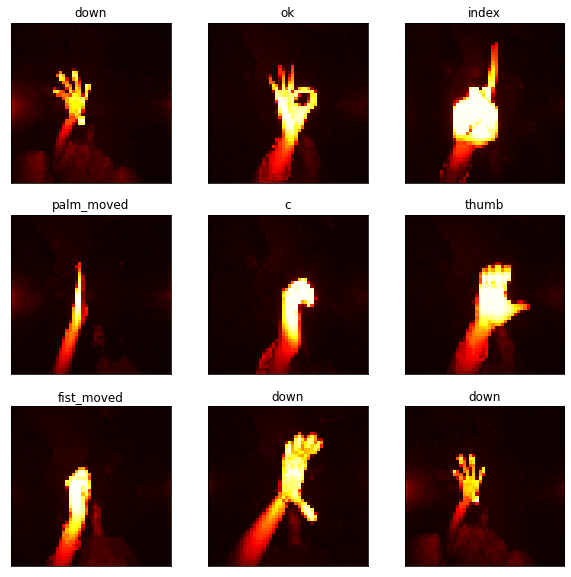

In [7]:
plt.figure(1, figsize=(10,10))
for i in range(1,10):
    plt.subplot(3,3,i)
    plt.imshow(image_data[i][0], cmap='hot')
    plt.xticks([])
    plt.yticks([])
    plt.title(CATEGORIES[label[i]][3:])
plt.show()

In [8]:
# Normalizing the data
input_data = np.array(input_data)
label = np.array(label)
input_data = input_data/255.0
input_data.shape

(20000, 50, 50)

In [9]:
# one hot encoding
label = keras.utils.to_categorical(label, num_classes=10,dtype='i1')
label[0]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 1], dtype=int8)

In [10]:
# reshaping the data
input_data.shape = (-1, IMG_SIZE, IMG_SIZE, 1)

In [11]:
# splitting the input_data to train and test data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(input_data, label, test_size = 0.3, random_state=0)

## The Model

In [12]:
model = keras.models.Sequential()

model.add(Conv2D(filters = 32, kernel_size = (3,3), input_shape = (IMG_SIZE, IMG_SIZE, 1)))
model.add(Activation('relu'))


model.add(Conv2D(filters = 32, kernel_size = (3,3)))
model.add(Activation('relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.3))

model.add(Conv2D(filters = 64, kernel_size = (3,3)))
model.add(Activation('relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.3))

model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy',
             optimizer = 'rmsprop',
             metrics = ['accuracy'])

In [13]:
model.fit(X_train, y_train, epochs = 7, batch_size=32, validation_data=(X_test, y_test))

Train on 14000 samples, validate on 6000 samples
Epoch 1/7
14000/14000 [==============================] - 6s 421us/step - loss: 0.3070 - accuracy: 0.9006 - val_loss: 0.0106 - val_accuracy: 0.9978
Epoch 2/7
14000/14000 [==============================] - 3s 206us/step - loss: 0.0151 - accuracy: 0.9961 - val_loss: 0.0042 - val_accuracy: 0.9992
Epoch 3/7
14000/14000 [==============================] - 3s 216us/step - loss: 0.0105 - accuracy: 0.9972 - val_loss: 0.0057 - val_accuracy: 0.9987
Epoch 4/7
14000/14000 [==============================] - 3s 204us/step - loss: 0.0094 - accuracy: 0.9983 - val_loss: 0.0069 - val_accuracy: 0.9983
Epoch 5/7
14000/14000 [==============================] - 3s 205us/step - loss: 0.0039 - accuracy: 0.9991 - val_loss: 0.0027 - val_accuracy: 0.9997
Epoch 6/7
14000/14000 [==============================] - 3s 207us/step - loss: 0.0056 - accuracy: 0.9984 - val_loss: 0.0065 - val_accuracy: 0.9993
Epoch 7/7
14000/14000 [==============================] - 3s 205us/ste

In [14]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 48, 48, 32)        320       
_________________________________________________________________
activation_1 (Activation)    (None, 48, 48, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 46, 46, 32)        9248      
_________________________________________________________________
activation_2 (Activation)    (None, 46, 46, 32)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 23, 23, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 23, 23, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 21, 21, 64)       

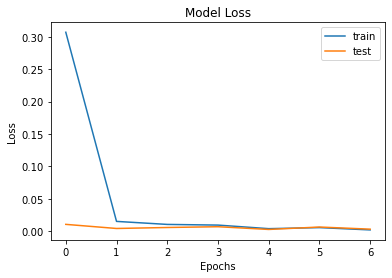

In [15]:
plt.plot(model.history.history['loss'])
plt.plot(model.history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train', 'test'])
plt.show()

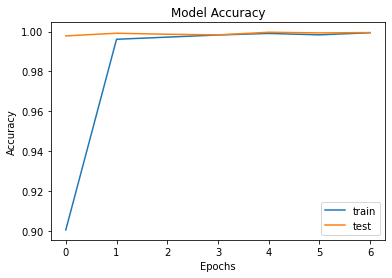

In [16]:
plt.plot(model.history.history['accuracy'])
plt.plot(model.history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'test'])
plt.show()

In [17]:
#calculate loss and accuracy on test data

test_loss, test_accuracy = model.evaluate(X_test, y_test)

print('Test accuracy: {:2.2f}%'.format(test_accuracy*100))

6000/6000 [==============================] - 0s 79us/step
Test accuracy: 99.95%


## Confusion Matrix

[]

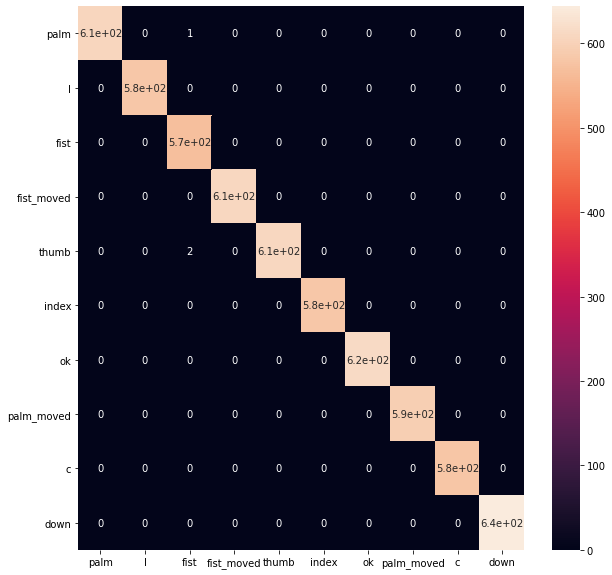

In [18]:
from sklearn.metrics import confusion_matrix
import seaborn as sn
cat = [c[3:] for c in CATEGORIES]
plt.figure(figsize=(10,10))
cm = confusion_matrix(np.argmax(y_test, axis=1), np.argmax(model.predict(X_test), axis=1))
sn.heatmap(cm, annot=True,xticklabels=cat, yticklabels=cat)
plt.plot()